<table style="width:100%">
  <tr>
    <th align="right"><img src="img/dilogo.png" style="float:left;height:90px"></th>
    <th align="center">
    <h1 align="center">Laboratorio 2</h1>
    <h2 align="center">Profesor: Ricardo Ñanculef</h2>
    <h3 align="center">Ayudante: Gabriel Ortega</h3>
    <h3 align="center">Alumno1;rol;malla</h3>
    <h3 align="center">Alumno2;rol;malla</h3>
    <h3 align="center">Septiembre de 2019</h3>
    </th> 
    <th align="left"><img src="img/usmlogo.png" style="float:right;height:85px"></th>
  </tr>

> <font size = "+2"><b>Antes de corregir se correrá su notebook utilizando la función Cell $\rightarrow$ Run All.</b> <br> <br>
Es posible que las simulaciones en este laboratorio se tarden un poco más en ejecutarse, sin embargo, mantenga un tope de 5 minutos.
</font>


## Instrucciones

La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual y ser entregado el 15 de octubre de 2019.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab2.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas, un README que indique la forma correcta de ejecutar su notebook y cualquier archivo/carpeta extra que considere necesario para el correcto funcionamiento de su tarea (no es necesario adjuntar los .csv que se utilicen para trabajar). El laboratorio puede ser trabajado tanto en lenguaje R como en python 3 (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará nota 0 en el laboratorio correspondiente y se notificará la situación al profesor.**




## 1. La paradoja del cumpleaños

La paradoja del cumpleaños es un problema matemático cuya respuesta es sorprendente dado el contexto del problema. En esta sección usted trabajará con este problema y podrá encontrar la respuesta que sorprendió a muchos. La paradoja es la siguiente: $N$ personas se reunen casualmente ¿Cuál es la probabilidad de que al menos 2 de ellas estén de cumpleaños el mismo día? **Considere año normal de 365 días.**

> a) Plantee la obtención de esta probabilidad en función de N. *Hint:* $\frac{Casos\;favorables}{Casos\;posibles}$


In [7]:
def paradox(n):
    
    probabilidad_all_differents = 1
    
    for x in range(0,n):
        probabilidad_all_differents = (365.0-x)/365.0 * probabilidad_all_differents 
    return 1 - probabilidad_all_differents




* El programa anterior simula la siguiente función de probabilidad en función de el N, que representa la cantidad de personas en la reunión:

* Con:

$D = Cantidad\;de\;dias\;de\;un\;año$

* La funcion de probabilidad es

$   
f(N) = 
     \begin{cases}
       1-\frac{D!}{(D)^N \cdot (D\;-\;N)! } &\quad\text{Si }1\leq\text{N} \leq365 \\
       1 & \text{etoc}
     \end{cases}
$



> b) Simule la paradoja del cumpleaños con varios $N \in [2,365]$ y obtenga la probabilidad empírica de encontrar dos personas con el mismo cumpleaños. Luego haga un gráfico de estas probabilidades en función de $N$ y la fórmula obtenida en a) y compare. 

*Tip: Como el orden de ejecución es $N\cdot Simulaciones$ no es necesario que vaya de 1 en 1 con los $N$ puede ir de 3 en 3, 5 en 5, etc.*

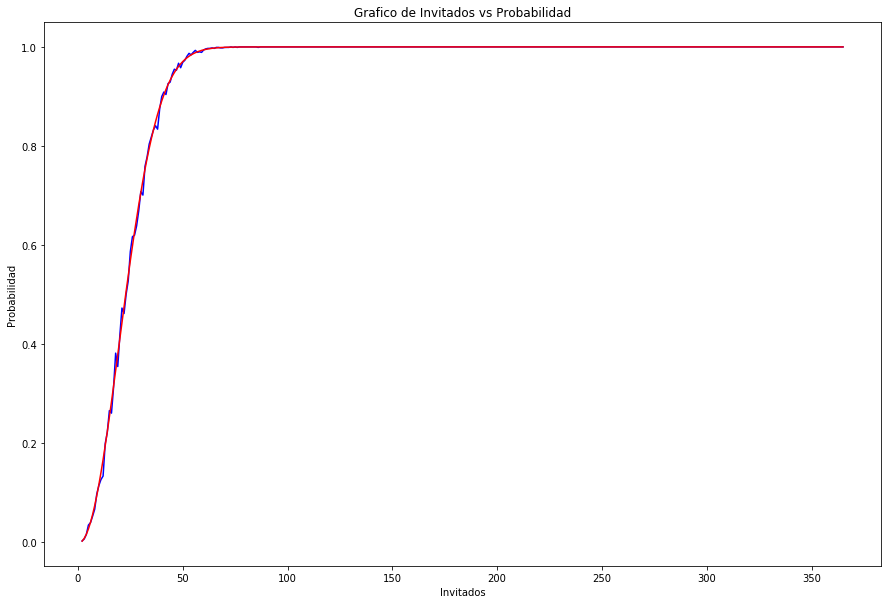

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

%matplotlib inline
def paradox(n):
    
    probabilidad_all_differents = 1
    
    for x in range(0,n):
        probabilidad_all_differents = (365.0-x)/365.0 * probabilidad_all_differents 
    return 1 - probabilidad_all_differents


probs = []

cantidad_reunion = []

teorica = []

random.seed(3)

for x in range(2,366):
    unicos = [] # cantidad de fechas q se repiten
    for i in range(0,1000):
        i = 0
        cumpleaños = {}
        cump = np.random.choice(range(1,366),x)
        if len(set(cump)) == len(cump):
            unicos.append(1)
        else:
            unicos.append(0)
    cantidad_reunion.append(x)
    p_cant = sum(unicos)/len(unicos)

    probs.append(1-p_cant)
    teorica.append(paradox(x))

creator = {"Invitados" : cantidad_reunion ,"Probabilidad Simulación" : probs,"Probabilidad Teorica" : teorica }

df_invitados = pd.DataFrame(creator)

fig, ax = plt.subplots(figsize=(15,10))

plt.xlabel('Invitados')
plt.ylabel('Probabilidad')
plt.title('Grafico de Invitados vs Probabilidad')

ax.plot(df["Invitados"], df["Probabilidad Simulación"], color = "blue")

ax.plot(df["Invitados"], df["Probabilidad Teorica"] , color = "red")


plt.show()


    

>c) Mediante simulación obtenga la cantidad de personas necesarias que debe asistir a la reunión para que la probabilidad de que al menos 2 personas estén de cumpleaños sea: 50%, 70% y 95%. Luego, para cada cantidad encontrada compare el valor de su probabilidad teórica mediante la fórmula que encontró en a). 

¿A qué se debe que al encontrar un valor empírico y evaluarlo en la fórmula de a) se observe un valor diferente que el encontrado? Si esto no le sucedió en su simulación, responda poniéndose en la siguiente situación:

- Su simulación le arrojó que 30 es el 50%
- F(30) es 0.45, claramente no llega al 50% (de ejemplo solamente)



¿A qué se debe ese error?

* Este error se debe netamente a que la simulación intenta realizar una aproximación del modelo matematico planteado,esta aproximacion es realizada con el metodo de montecarlo,esto a traves de la generación de N cumpleaños aleatorios en K reuniones con N invitados. Es por lo anterior que debe simularse K veces por cada N cantidad de invitados, ya que el comportamiento promedio en este caso nos proporcionara el valor simulado, mientras que el modelo analitico a partir de la función de probabilidad en a) depende unicamente de un calculo numerico con cada cantidad de N invitados.

A continuación se muestran las probabilidades simuladas y teoricas para cada cantidad de invitados:

In [9]:
print (df_invitados.head(60))

    Invitados  Probabilidad Simulación  Probabilidad Teorica
0           2                    0.003              0.002740
1           3                    0.008              0.008204
2           4                    0.017              0.016356
3           5                    0.031              0.027136
4           6                    0.028              0.040462
5           7                    0.063              0.056236
6           8                    0.088              0.074335
7           9                    0.091              0.094624
8          10                    0.122              0.116948
9          11                    0.157              0.141141
10         12                    0.182              0.167025
11         13                    0.183              0.194410
12         14                    0.220              0.223103
13         15                    0.268              0.252901
14         16                    0.291              0.283604
15         17           

>d) Si ahora nos interesa cuando 3, 4, 5 y 6 personas están de cumpleaños el mismo día. Realice un gráfico similar al del inciso b) pero esta vez con $P_{i}$ en función de $N$ donde $i \in [2,6]$ Concluya respecto al comportamiento de las gráficas.

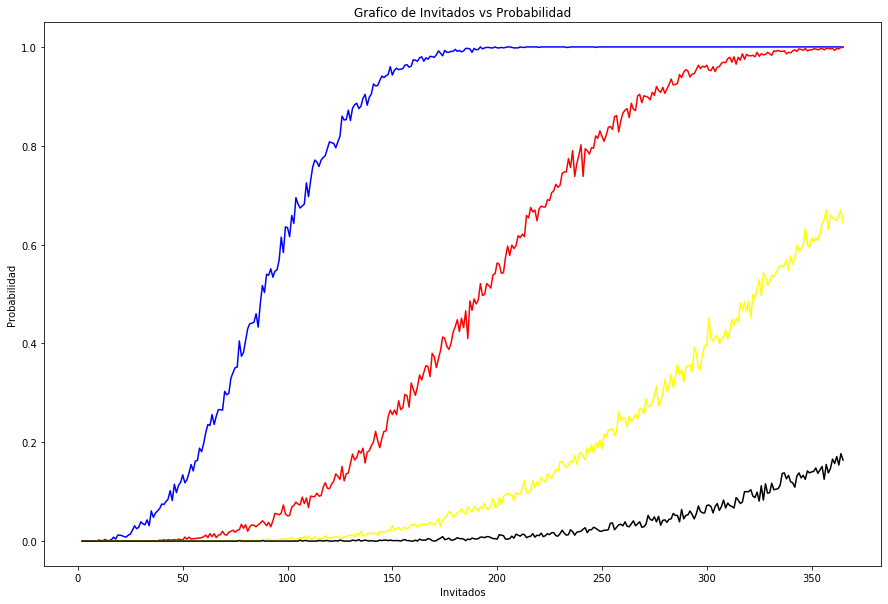

In [14]:
p3=[]
p4=[]
p5=[]
p6=[]

cantidad_reunion = []

teorica = []

random.seed(3)

for x in range(2,366):
    probs_3 = []
    probs_4 = []
    probs_5 = []
    probs_6 = []
    for i in range(0,1000):
        i = 0
        cumpleaños = {}
        cump = np.random.choice(range(1,366),x)
        for fecha in cump:
            if fecha in cumpleaños:
                cumpleaños[fecha] += 1
            else:
                cumpleaños[fecha] = 1
        if 6 in cumpleaños.values():
            probs_6.append(1)
        else:
            probs_6.append(0)
        if 5 in cumpleaños.values():
            probs_5.append(1)
        else:
            probs_5.append(0)
        if 4 in cumpleaños.values():
            probs_4.append(1)
        else:
            probs_4.append(0)
        if 3 in cumpleaños.values():
            probs_3.append(1)
        else:
            probs_3.append(0)
    cantidad_reunion.append(x)
    p3.append(sum(probs_3)/len(probs_3))
    p4.append(sum(probs_4)/len(probs_4))
    p5.append(sum(probs_5)/len(probs_5))
    p6.append(sum(probs_6)/len(probs_6))
    
    
creator = {"Invitados" : cantidad_reunion ,"Probabilidad 3" : p3,"Probabilidad 4" : p4,"Probabilidad 5" : p5,"Probabilidad 6" : p6 }

df_invitados = pd.DataFrame(creator)

fig, ax = plt.subplots(figsize=(15,10))

plt.xlabel('Invitados')
plt.ylabel('Probabilidad')
plt.title('Grafico de Invitados vs Probabilidad')

ax.plot(df_invitados["Invitados"], df_invitados["Probabilidad 3"], color = "blue")

ax.plot(df_invitados["Invitados"], df_invitados["Probabilidad 4"] , color = "red")

ax.plot(df_invitados["Invitados"], df_invitados["Probabilidad 5"] , color = "yellow")

ax.plot(df_invitados["Invitados"], df_invitados["Probabilidad 6"] , color = "black")


plt.show()



* A partir del grafico se puede observar que a medida que se quiere más invitados con un mismo cumpleaños, se necesitan mas personas invitadas para subir la probabilidad de que ese fenomeno ocurra, es decir , la repetición de un cumpleaños depende directamente de cuanta cantidad de gente ha sido invitada a la reunión.

>e) Debido a una falla espacio-temporal usted ha sido re-ubicado a otra dimensión donde los años tienen 1000 días. Necesita comprar algo para comer y no morir de hambre mientras los científicos de dicho universo lo intentan enviar de vuelta a casa. Usted ha decidido apostar con una persona con la base de la paradoja del cumpleaños. ¿Cuántas personas debería haber en la junta para tener al menos una certeza del 90% de que ganará la apuesta?

In [ ]:
def paradox_1000(n):
    
    probabilidad_all_differents = 1
    
    for x in range(0,n):
        probabilidad_all_differents = (1000-x)/1000.0 * probabilidad_all_differents 
    return 1 - probabilidad_all_differents

probabilidad = 0
while probabilidad<0.9:
        n=2
        probabilidad = paradox_1000(n)
        n+=1
print("Se necesitan "+ str(n) " personas para estar un 90% seguros de ganar la apuesta")

>f) ¿Cuál es la probilidad de que una persona tenga el mismo cumpleaños que usted? (365 días)

In [21]:
def paradox_propio(n):
    return 1 - (364/365.0)**n

print("La probabilidad de que una persona tenga el mismo cumpleaños mio en una reunion de 1000 personas es : " + str(paradox_propio(253)))

La probabilidad de que una persona tenga el mismo cumpleaños mio en una reunion de 1000 personas es : 0.5004771540365807


## 2. Redes Complejas



El tema de Redes Complejas (grafos con muchos nodos) ha estado creciendo últimamente, sus orígenes se remontan a fines de los 90. Una de las propuestas para modelar la construcción de estas redes es la siguiente:

1. Se inicia con un solo nodo 
2. En cada iteración se agrega un nuevo nodo.
3. La probabilidad de unirse a un nodo viene dado por la siguiente expresión: $ P(Unirse\,al\,nodo_i) = \frac{Grado\,Nodo_i}{Grado\,Total\,Grafo}$ donde el Grado Total del Grafo corresponde a la suma de los grados de cada nodo perteneciente a este.
4. Se repite (2) y (3) varias veces hasta tener una red bastante grande.

A este tipo de red se les conoce como "Scale Free".

Un listado de links para refrescar conceptos: 

* [Grafo](https://es.wikipedia.org/wiki/Grafo)
* [Grado de un nodo](https://es.wikipedia.org/wiki/Grado_(teor%C3%ADa_de_grafos))


>a) Simule grafos de: 100, 1000 y 5000 nodos de la forma indicada y haga un scatterplot de Cantidad de Nodos v/s Grado del Nodo para los 3 grafos.

* Recuerde que las probabilidades se modifican después de agregar un nodo.
* Puede hacer una única iteración de 5000 pasos y guardar el estado de la red en 1000, 5000 y 10000.
* La matriz de adyacencia le facilitará el trabajo de obtener el grado de cada nodo (no es necesario hacerla, pero si tiene problemas encontrando alguna estructura de datos, esta le puede servir).

Matriz de Adyacencia:

Es una matriz cuadrada de $NxN$ donde en la posición $i,j$ hay un 1 si entre los nodos $i$ y $j$ hay una arista, de lo contrario esa entrada es 0. La diagonal en este casó será de 0 solamente.




>b) Observando los gráficos realizados en a) ¿Qué puede decirse acerca de la distribución de grado?

>c) Si se quitan aristas con una probabilidad $\rho$ ¿Cómo cambia la distribución de grado del grafo de 10000 nodos? Genere gráficos de Cantidad de Nodos v/s Grado del Nodo para distintos valores de $\rho$ para ayudarle en su respuesta. ¿Sigue siendo de libre escala, pierde forma definida o se asemeja a otra distribución?


## 3. Artistas Musicales

En esta sección usted cuenta con dos datasets "albums.csv" y "artists.csv", el primero cuenta con información de álbums musicales lanzados por diversos artistas como el número de ventas, el estilo musical, puntajes según distintos críticos, etc. El segundo contiene datos sobre diversos artistas, como su nombre, puesto en la banda, pais de origen, etc. 

Para información más detallada de los datasets [aquí](https://www.kaggle.com/revilrosa/music-label-dataset#artists.csv)

>a) Cargue ambos dataset, cuente la cantidad de celdas nulas por columna en c/u y limpielas si cree necesario. 

>b) Responda las siguientes preguntas utilizando recursos visuales (tablas, gráficos). 

* Haga un top 10 de los mejores álbumes para cada crítico
* En función del puntaje promedio, ordene los géneros musicales de mejor ranking a peor.
* Top 5 de países con álbumes mejor calificados.
* Top 10 de artistas con más albumes publicados.
* ¿Qué generos predominan en los artistas Chilenos?
* Separando a los artistas en los que nacieron antes de 1980 y de 1980 en adelante. Si consideramos los años 2005, 2010, 2015 y 2019 ¿cómo han ido evolucionando los puntajes promedio de ambos grupos con el paso del tiempo? ¿Es posible evidenciar alguna tendencia?
* Haga una línea del tiempo donde en cada año se indique los 3 géneros con más álbumes publicados* ¿Se evidencia alguna tendencia? Haga la misma línea de tiempo para algún páis en específico de su elección y compare, si en algún año no hubo publicación deje la casilla marcada con "-".

Para la línea del tiempo se sugiere un formato como el siguiente: 

| 2000 | 2001 | 2002 | 2003 | 2004 |
|------|------|------|------|------|
| 1°   | 1°   | 1°   | 1°   | 1°   |
| 2°   | 2°   | 2°   | 2°   | 2°   |
| 3°   | 3°   | 3°   | -   | 3°   |

* ¿Hay alguna diferencia en los géneros que artistas Chilenos, Argentinos, Peruanos y Bolivianos publicaban?

>c) Utilizando el siguiente subconjunto de países: "United States", "Chile", "Japan", ¿es el país un buen predictor del puntaje promedio? ¿Y viceversa? Responda utilizando criterios de probabilidad condicional y considere los intervalos del puntaje promedio en los percentiles: $[0,33],[34,66],[67,100]$. ¿Importa si se utiliza solo el subconjunto de datos o el dataset entero? 


**Bonus +10** El país como predictor del puntaje en cada crítico y viceversa.

>d) ¿Se puede decir que el género de un álbum es buen predictor del número de ventas? ¿Y viceversa? Responda utilizando criterios de probabilidad condicional. 

Fije los intervalos de las ventas en los cuartiles 

## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ Las dudas deberán ser publicadas en moodle para que sus compañeros puedan beneficiarse de la respuesta, no se aceptarán dudas vía correo ni redes sociales, esto es para fomentar que todos tengan la misma información.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.6.1
+ La versión de Python que se usará para revisar es 3.6.8
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, **explique su procedimiento y luego responda.** 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)